In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_wine = pd.read_csv(r'C:\Users\batman\Downloads\winequality.csv')
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df_wine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

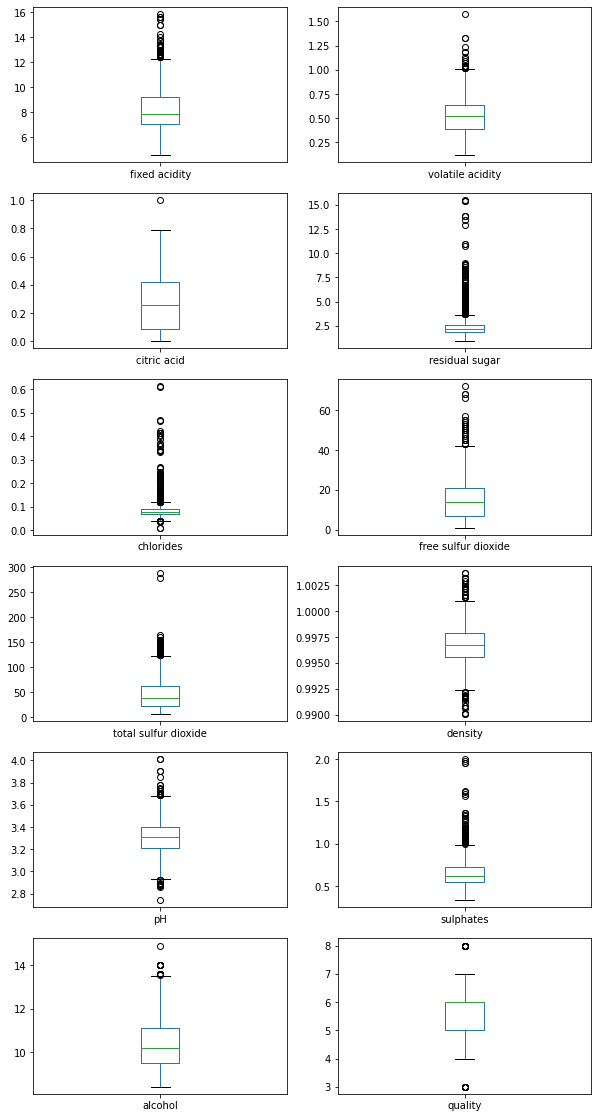

In [6]:
df_wine.plot(kind='box',subplots=True,figsize=(10,20),layout=(6,2))
plt.show()

In [7]:
from scipy.stats import zscore
z = np.abs(zscore(df_wine))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        0.78782264],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        0.78782264],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        0.78782264],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.45084835],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        0.78782264],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.45084835]])

In [8]:
np.where(z>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
         106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
         151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
         244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
         354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
         459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
         555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
         639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
         690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
         821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
         982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
        1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
        1244, 1244, 1260, 1269, 1269, 

In [9]:
df_new = df_wine[(z<3).all(axis=1)]
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [10]:
df_new.quality.unique()

array([5, 6, 7, 4, 8], dtype=int64)

In [11]:
df_new.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
dtype: float64

In [12]:
a = ['alcohol','sulphates','total sulfur dioxide','free sulfur dioxide','chlorides','residual sugar','fixed acidity']
for arg in a:
    df_new[arg] = np.log(df_new[arg])
    
print(df_new.skew())
    

fixed acidity           0.377931
volatile acidity        0.380659
citric acid             0.291297
residual sugar          1.227096
chlorides               0.496272
free sulfur dioxide    -0.303456
total sulfur dioxide   -0.096908
density                 0.055738
pH                      0.114705
sulphates               0.342375
alcohol                 0.592414
quality                 0.407865
dtype: float64


In [13]:
df_new['alcohol'] = np.log(df_new['alcohol'])
df_new['residual sugar'] = np.log(df_new['fixed acidity'])
df_new.skew()

fixed acidity           0.377931
volatile acidity        0.380659
citric acid             0.291297
residual sugar          0.154006
chlorides               0.496272
free sulfur dioxide    -0.303456
total sulfur dioxide   -0.096908
density                 0.055738
pH                      0.114705
sulphates               0.342375
alcohol                 0.525551
quality                 0.407865
dtype: float64

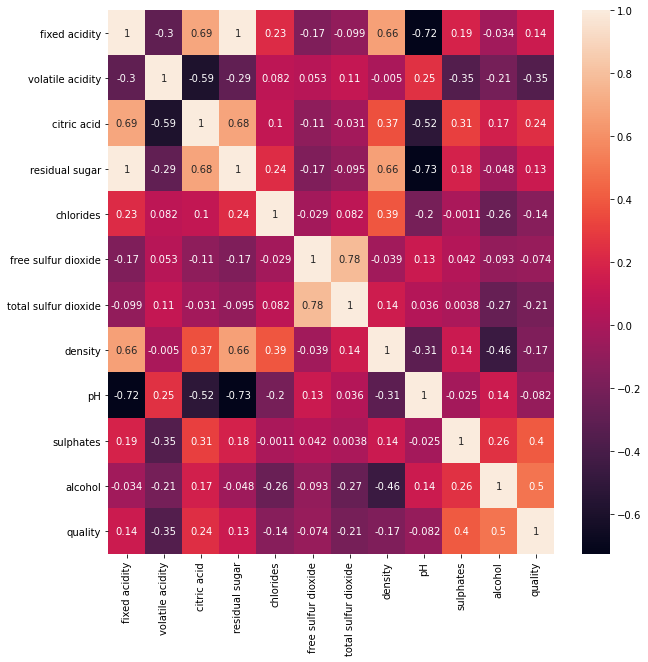

In [14]:
hmap_corr = df_new.corr()
plt.figure(figsize=(10,10))
sns.heatmap(hmap_corr,annot=True)
plt.show()

In [15]:
df_new.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,2.098958,0.522950,0.265382,0.737383,-2.535942,2.511981,3.556140,0.996710,3.315934,-0.461454,0.848996,5.659545
std,0.190296,0.168531,0.190934,0.089924,0.230449,0.665323,0.682275,0.001716,0.141096,0.193899,0.040312,0.781605
min,1.609438,0.120000,0.000000,0.475885,-3.270169,0.000000,1.791759,0.991500,2.880000,-1.108663,0.760837,4.000000
25%,1.960095,0.390000,0.090000,0.672993,-2.659260,1.945910,3.044522,0.995600,3.220000,-0.597837,0.811504,5.000000
50%,2.066863,0.520000,0.250000,0.726032,-2.538307,2.564949,3.583519,0.996700,3.310000,-0.478036,0.842596,6.000000
75%,2.219203,0.630000,0.420000,0.797148,-2.419119,3.044522,4.060443,0.997800,3.400000,-0.328504,0.878358,6.000000
max,2.602690,1.040000,0.790000,0.956545,-1.487220,3.850148,4.976734,1.002200,3.750000,0.148420,0.959377,8.000000


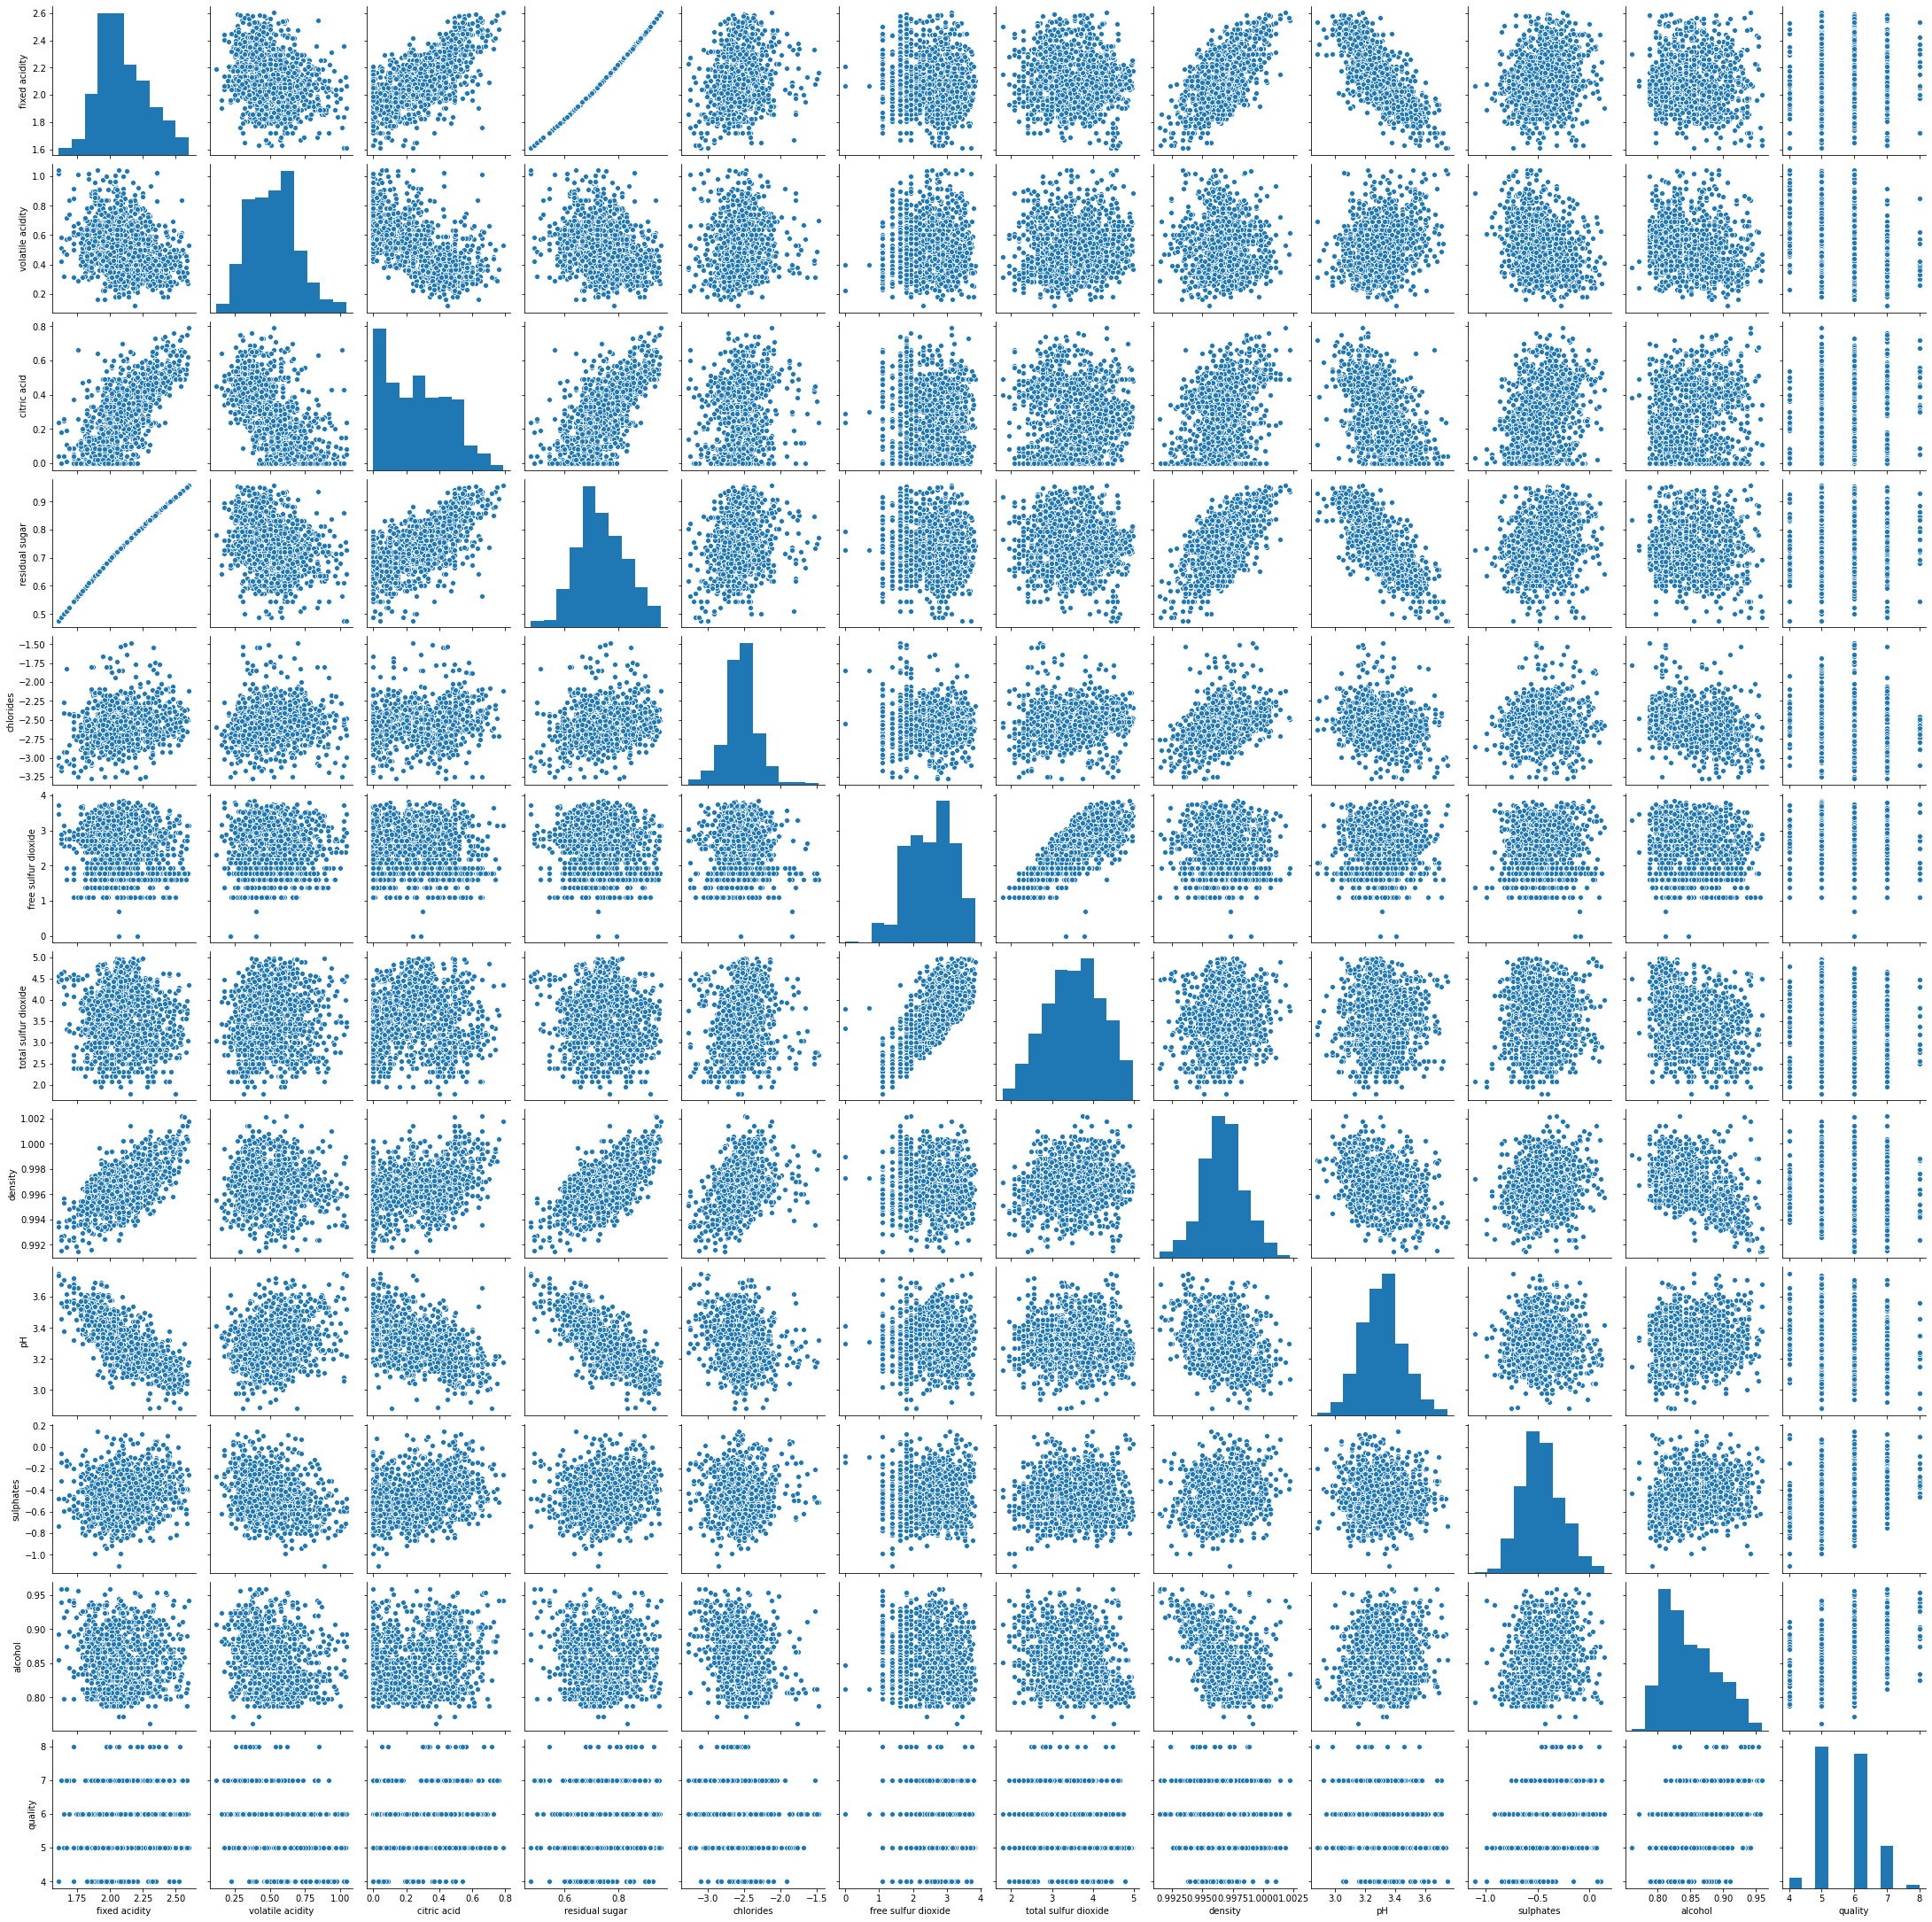

In [16]:
sns.pairplot(df_new)

In [17]:
x = df_new.drop(columns = 'quality')
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2.001480,0.700,0.00,0.693887,-2.577022,2.397895,3.526361,0.99780,3.51,-0.579818,0.806793
1,2.054124,0.880,0.00,0.719849,-2.322788,3.218876,4.204693,0.99680,3.20,-0.385662,0.825220
2,2.054124,0.760,0.04,0.719849,-2.385967,2.708050,3.988984,0.99700,3.26,-0.430783,0.825220
3,2.415914,0.280,0.56,0.882078,-2.590267,2.833213,4.094345,0.99800,3.16,-0.544727,0.825220
4,2.001480,0.700,0.00,0.693887,-2.577022,2.397895,3.526361,0.99780,3.51,-0.579818,0.806793
...,...,...,...,...,...,...,...,...,...,...,...
1594,1.824549,0.600,0.08,0.601333,-2.407946,3.465736,3.784190,0.99490,3.45,-0.544727,0.855000
1595,1.774952,0.550,0.10,0.573774,-2.780621,3.663562,3.931826,0.99512,3.52,-0.274437,0.882078
1596,1.840550,0.510,0.13,0.610064,-2.577022,3.367296,3.688879,0.99574,3.42,-0.287682,0.874591
1597,1.774952,0.645,0.12,0.573774,-2.590267,3.465736,3.784190,0.99547,3.57,-0.342490,0.842596


In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-0.51241835,  1.05091371, -1.39039974, ...,  1.37589608,
        -0.61065143, -1.04727826],
       [-0.235682  ,  2.11933582, -1.39039974, ..., -0.8219512 ,
         0.39101696, -0.59000499],
       [-0.235682  ,  1.40705441, -1.18083057, ..., -0.3965614 ,
         0.15823656, -0.59000499],
       ...,
       [-1.35839334, -0.07686519, -0.70929993, ...,  0.73781138,
         0.89650672,  0.63515944],
       [-1.70322361,  0.72445139, -0.76169222, ...,  1.80128587,
         0.61374608, -0.15881543],
       [-1.61487234, -1.26400088,  1.07203802, ...,  0.52511649,
         0.23700283,  0.63515944]])

In [19]:
y = df_new.loc[:,'quality']
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1451, dtype: int64

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [21]:
def best_parameter(model,para):
    from sklearn.model_selection import GridSearchCV
    
    grd = GridSearchCV(model,para,cv=10)
    grd.fit(x,y)
    return [grd.best_params_, grd.best_score_]

In [22]:
dtc =DecisionTreeClassifier()
mnb = MultinomialNB()
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()
svc = SVC()

model_params ={
    
    'decisontree' : {
        
        'model' : dtc,
        'para':{
            
            'criterion':['gini','entropy'],
            'splitter':['best','random']}
    },
    'randomforest' : {
        'model':rfc,
        'para':{
            'n_estimators':list(range(1,20)),
            'criterion':['gini','entropy']}
    },
    'Kneigh' : {
        
        'model': knn,
        'para':{
            
            'n_neighbors':list(range(1,20)),
            'weights':['uniform','distance']}
    },
    'SupVec' :{
        
        
        'model': svc,
        'para':{
            'C':list(range(1,20,3)),
            'kernel':['rbf','linear']}
    }
}


In [23]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name,mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['para'],scoring='accuracy', cv=5)
    clf.fit(x,y)
    scores.append({
        'model': model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })

In [24]:
print(scores)
from sklearn.model_selection import cross_val_score
#Logistic Regression
lg = LogisticRegression()
cv_score = cross_val_score(lg,x,y,cv=10,scoring='accuracy')
cv_score.mean()

[{'model': 'decisontree', 'best_score': 0.4769095864438914, 'best_params': {'criterion': 'gini', 'splitter': 'best'}}, {'model': 'randomforest', 'best_score': 0.576871667259154, 'best_params': {'criterion': 'entropy', 'n_estimators': 17}}, {'model': 'Kneigh', 'best_score': 0.5768455978196468, 'best_params': {'n_neighbors': 17, 'weights': 'distance'}}, {'model': 'SupVec', 'best_score': 0.5803317928664533, 'best_params': {'C': 1, 'kernel': 'rbf'}}]


0.5865847897968823

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

lm =LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
svr = SVR()
modelr_params = {
    'decision reg':{
        'model': dtr,
        'para': {
            'criterion':['mse','friedman_mse','mae'],
            'splitter':['best','random']
        }
    },
    
    'random_forest' :{
        'model': rfr,
        'para' : {
            'n_estimators':list(range(1,120,10)),
            'criterion':['mse','mae']
        }
    },
    'svr': {
        'model':svr,
        'para':{
            'degree':[2,3,4],
            'gamma':['scale','auto'],
            'kernel':['rbf','linear','poly']
        }
    },
    
}

In [26]:
from sklearn.model_selection import GridSearchCV
score = []

for modelr_name,mpr in modelr_params.items():
    clf = GridSearchCV(mpr['model'],mpr['para'],scoring='r2',cv=5)
    clf.fit(x,y)
    score.append({
        'model': modelr_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })

In [27]:
score

[{'model': 'decision reg',
  'best_score': -0.4198461817358853,
  'best_params': {'criterion': 'mse', 'splitter': 'random'}},
 {'model': 'random_forest',
  'best_score': 0.3177943738600722,
  'best_params': {'criterion': 'mse', 'n_estimators': 101}},
 {'model': 'svr',
  'best_score': 0.33044544739381626,
  'best_params': {'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}}]

In [28]:
#Best Score in Logistic Regression
cv_score = cross_val_score(lg,x,y,cv=10,scoring='accuracy')
cv_score.mean()

0.5865847897968823